
# LOGISTIC REGRESSION


In [74]:
# Data Exploration

In [75]:
import numpy as np # importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%matplotlib inline
# to render plots in the notebook

In [77]:
# Loading dataset

df= pd.read_csv('Titanic_train.csv')

In [78]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [79]:
df['Survived'].value_counts() 
# Binary variable. Target of logistic regression is binary in nature.

Survived
0    549
1    342
Name: count, dtype: int64

In [80]:
df.shape

(891, 12)

In [81]:
import math

In [82]:
# Finding the sum of null values in the columns


In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# Datatypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df.Name.value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [86]:
df.PassengerId.value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [87]:
# Since name column is categorical and with unique values, this is changed into index

In [88]:
df_new=df.set_index('Name')
df_new.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [89]:
df_new['Ticket'].nunique

<bound method IndexOpsMixin.nunique of Name
Braund, Mr. Owen Harris                                       A/5 21171
Cumings, Mrs. John Bradley (Florence Briggs Thayer)            PC 17599
Heikkinen, Miss. Laina                                 STON/O2. 3101282
Futrelle, Mrs. Jacques Heath (Lily May Peel)                     113803
Allen, Mr. William Henry                                         373450
                                                             ...       
Montvila, Rev. Juozas                                            211536
Graham, Miss. Margaret Edith                                     112053
Johnston, Miss. Catherine Helen "Carrie"                     W./C. 6607
Behr, Mr. Karl Howell                                            111369
Dooley, Mr. Patrick                                              370376
Name: Ticket, Length: 891, dtype: object>

In [90]:
df_new['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [91]:
# Out of total 891 values, 681 are unique. Also these are ticket ids and hence there seems no relation with target column
# in logistic regression. Therefore this column is being deleted / dropped.

In [92]:
df_new_1=df_new


In [93]:
df_new_1=df_new_1.drop(['Ticket'],axis=1)

In [94]:
df_new_1.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.25,NaN,S


In [95]:
df_new_1['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [96]:
df_new_1['Cabin'].isnull().sum()

687

In [97]:
(687/891)*100

77.10437710437711

In [98]:
# More than 40% of the data which is 77% is missing values. This column can be dropped.

In [99]:
df_new_1 = df_new_1.drop(['Cabin'],axis=1)

In [100]:
df_new_1.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Name,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.25,S


In [101]:
# Performing one hot encoding for 'Embarked' and 'Sex' columns.

In [102]:
df_new_1=pd.get_dummies(df_new_1,columns=['Sex'])

In [103]:
df_new_1=pd.get_dummies(df_new_1,columns=['Embarked'])

In [104]:
df_new_1.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,22.0,1,0,7.2500,False,True,False,False,True
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,1,0,71.2833,True,False,True,False,False


In [105]:
# Changing the boolean values obtained using one hot encoding into numerical columns 

In [106]:
df_new_1[['Sex_female','Sex_male']]=df_new_1[['Sex_female','Sex_male']].astype(int)

In [107]:
df_new_1[['Embarked_C','Embarked_Q','Embarked_S']]=df_new_1[['Embarked_C','Embarked_Q','Embarked_S']].astype(int)

In [108]:
df_new_1.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,22.0,1,0,7.2500,0,1,0,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,1,0,71.2833,1,0,1,0,0


In [109]:
# Column 'Name' and 'PassengerId' are totally unique. Although 'name' has been changed into index initially,
# for convenience of readability in plots, the index can be replaced with 'PassengerIds'.
# Hence dropping the 'name' index and replacing with 'PassengerId' index.

In [110]:
df_new_1=df_new_1.set_index('PassengerId')
df_new_1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0


In [111]:
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_C  891 non-null    int32  
 9   Embarked_Q  891 non-null    int32  
 10  Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 66.1 KB


In [112]:
df_new_1.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [113]:
# All data has been converted into numerical format. The null values of 'Age' need to be
# imputed. 20% of the age data are missing and hence median values can be used to replace the missing values.

df_new_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Since there is no big difference between mean and median, any of them can be used for data imputation

In [115]:
m=df_new_1['Age'].median()

In [116]:
m

28.0

In [117]:
df_new_1['Age']=df_new_1['Age'].fillna(m)

In [118]:
df_new_1.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [119]:
# All missing values have been imputed

In [120]:
# Data Visualization

# Bar plots and histograms

In [121]:
import math

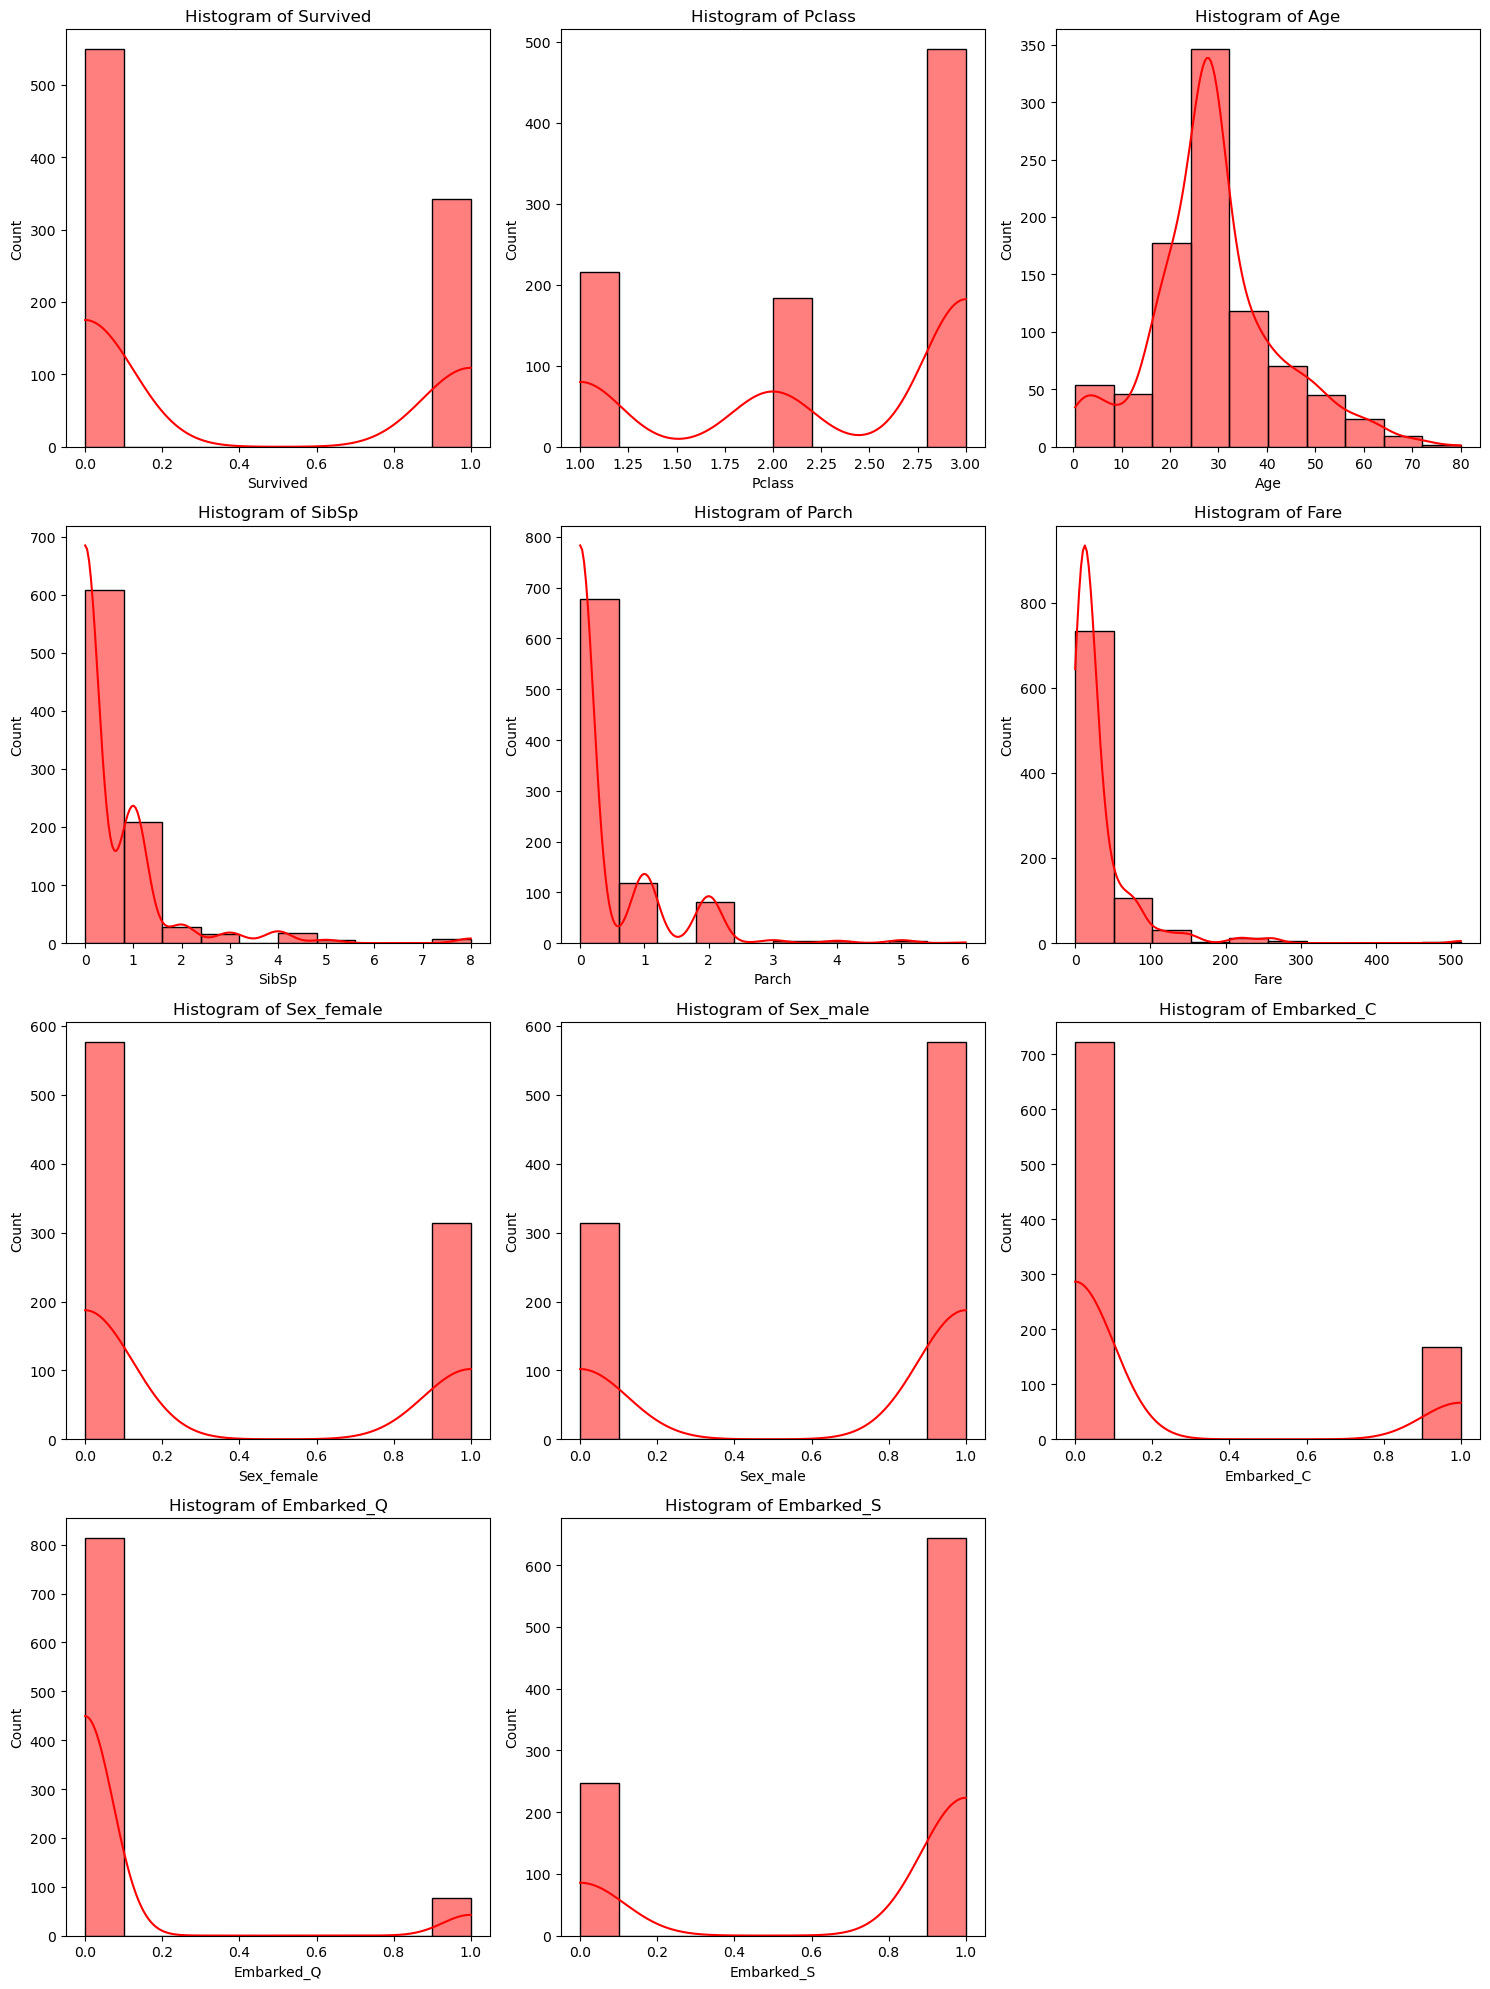

In [122]:
num_cols=len(df_new_1.columns)
rows=math.ceil(num_cols/3)

plt.figure(figsize=(15,rows*5))
for i,col in enumerate(df_new_1.columns,1):
    plt.subplot(rows,3,i)
    sns.histplot(df_new_1[col], kde=True, bins=10, color='red')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [123]:
# Box plots

# Visualizing boxplots woth matplotlib

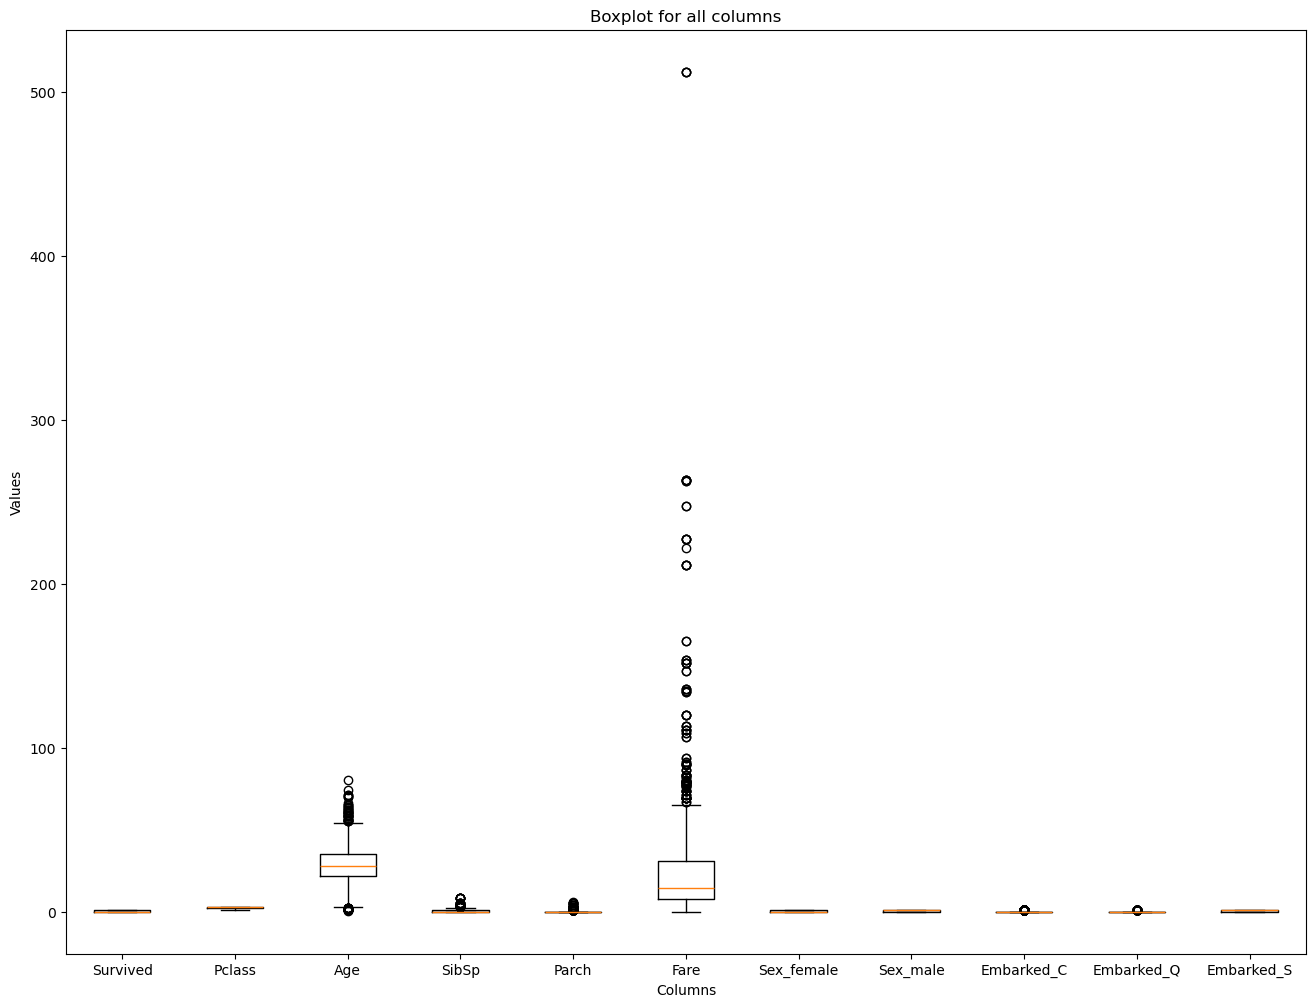

In [124]:
plt.figure(figsize=(16,12)) 
plt.boxplot([df_new_1[col] for col in df_new_1.columns], tick_labels=df_new_1.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [125]:
# Significant outliers can be seen in 'Fare' and 'Age'. Treating outliers

In [126]:
# Removing outliers and replacing with medians



def remove_outliers_with_median(df_new_1, selected_columns):
    df_cleaned=df_new_1.copy()
    for col in selected_columns:
        Q1=df_new_1[col].quantile(0.25)
        Q3=df_new_1[col].quantile(0.75)
        IQR=Q3-Q1 #Interquartile range
        
        
#         Range of whiskers
        lower_bound=Q1-1.5*IQR 
        upper_bound=Q3+1.5*IQR
        
#         Replace outliers with median
        median_value_cleaned=df_new_1[col].median()
        df_cleaned[col]=df_new_1[col].apply(lambda x: median_value_cleaned if x<lower_bound or x>upper_bound else x)
        
    return (df_cleaned)
        
selected_columns = ['Age', 'Fare']
df_cleaned = remove_outliers_with_median(df_new_1, selected_columns)


In [127]:
# For cleaned data, new boxplots are generated

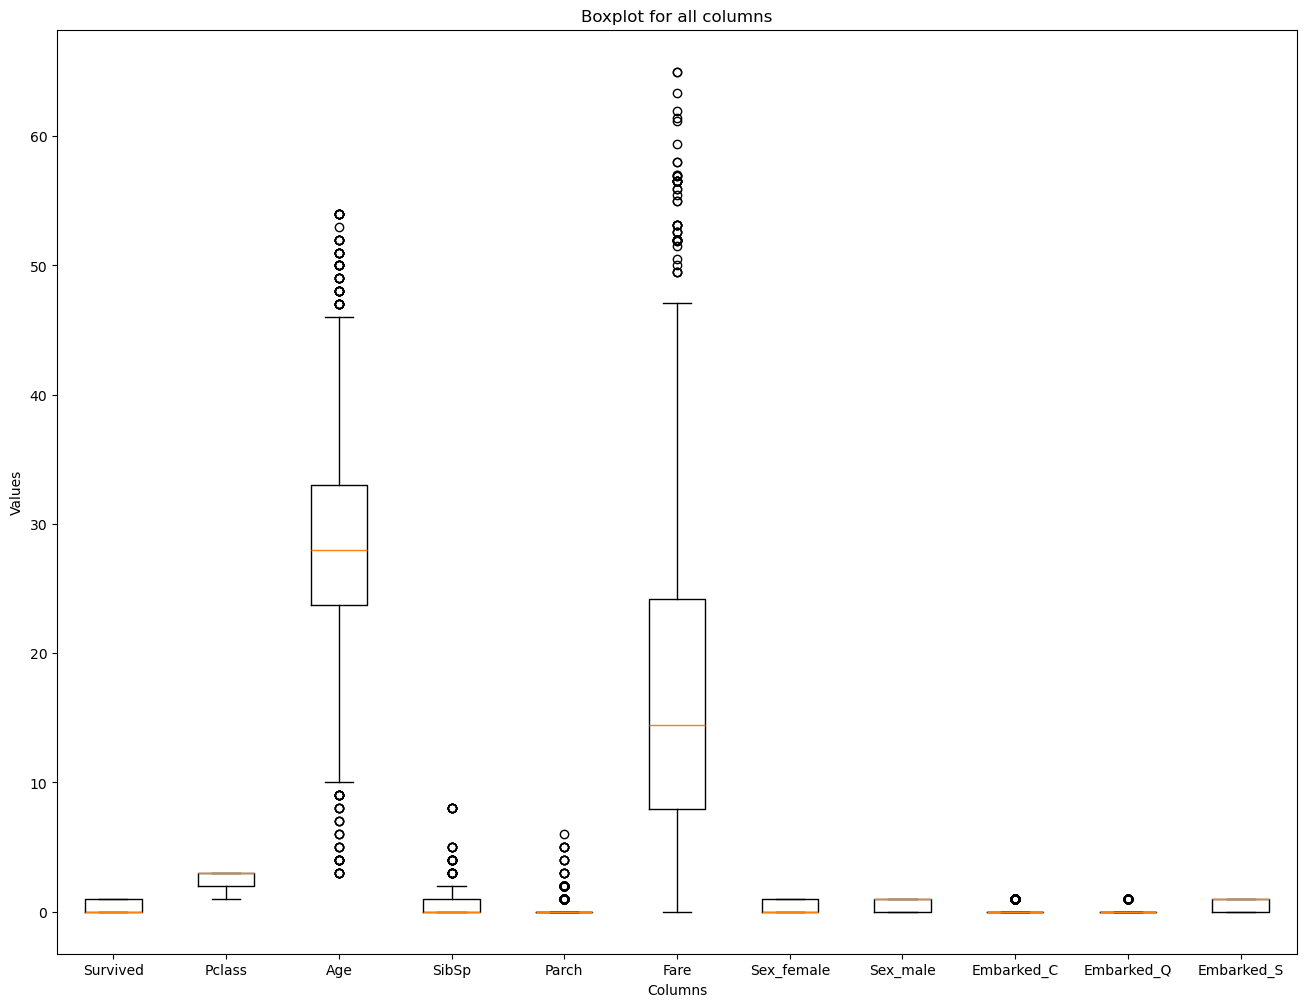

In [128]:
plt.figure(figsize=(16,12)) 
plt.boxplot([df_cleaned[col] for col in df_cleaned.columns], tick_labels=df_cleaned.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [129]:
# Removing 'SibSp' and 'Parch' outliers too

In [130]:
selected_columns = ['Age', 'Fare']
df_cleaned = remove_outliers_with_median(df_new_1, selected_columns)

In [131]:
df_cleaned['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [132]:
df_cleaned['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [133]:
# Removing outliers of 'SibSp' and 'Parch' columns as well

In [134]:
selected_columns = ['SibSp', 'Parch']
df_cleaned = remove_outliers_with_median(df_new_1, selected_columns)

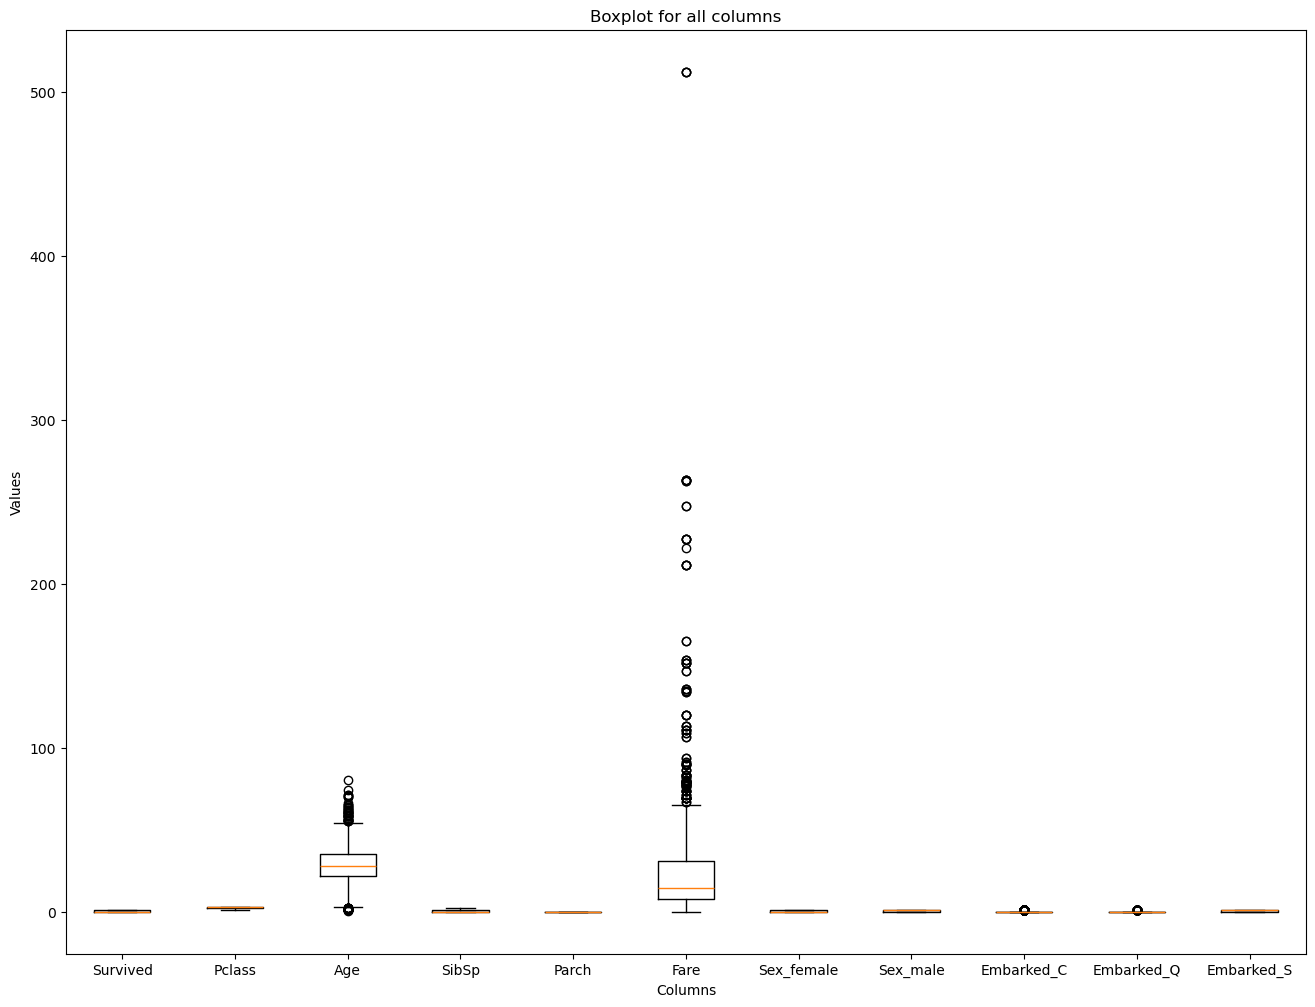

In [135]:
plt.figure(figsize=(16,12)) 
plt.boxplot([df_cleaned[col] for col in df_cleaned.columns], tick_labels=df_cleaned.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

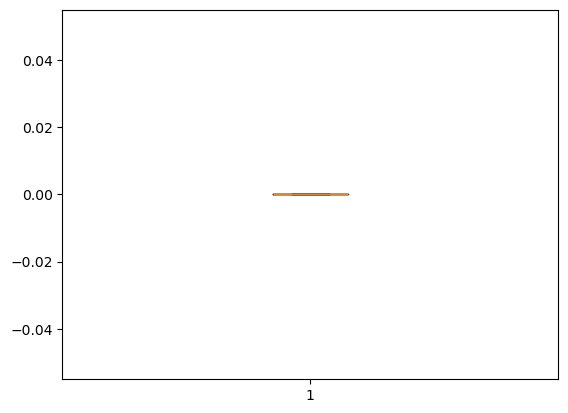

In [136]:
data_box_new=df_cleaned.Parch
# Rechecking outlier removal of column 'Parch' in the new dataframe.
b=plt.boxplot(data_box_new)
plt.show()

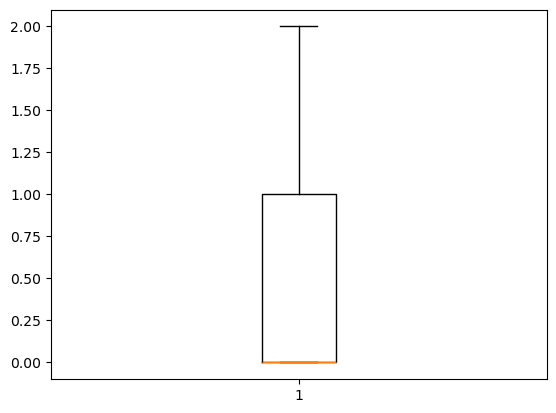

In [137]:
data_box_new=df_cleaned.SibSp
# Rechecking outlier removal of column 'Parch' in the new dataframe.
b=plt.boxplot(data_box_new)
plt.show()

In [138]:
# Outliers treatment done

In [139]:
df_cleaned

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1.0,0.0,7.2500,0,1,0,0,1
2,1,1,38.0,1.0,0.0,71.2833,1,0,1,0,0
3,1,3,26.0,0.0,0.0,7.9250,1,0,0,0,1
4,1,1,35.0,1.0,0.0,53.1000,1,0,0,0,1
5,0,3,35.0,0.0,0.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0.0,0.0,13.0000,0,1,0,0,1
888,1,1,19.0,0.0,0.0,30.0000,1,0,0,0,1
889,0,3,28.0,1.0,0.0,23.4500,1,0,0,0,1


In [140]:
# Histogram after data cleaning


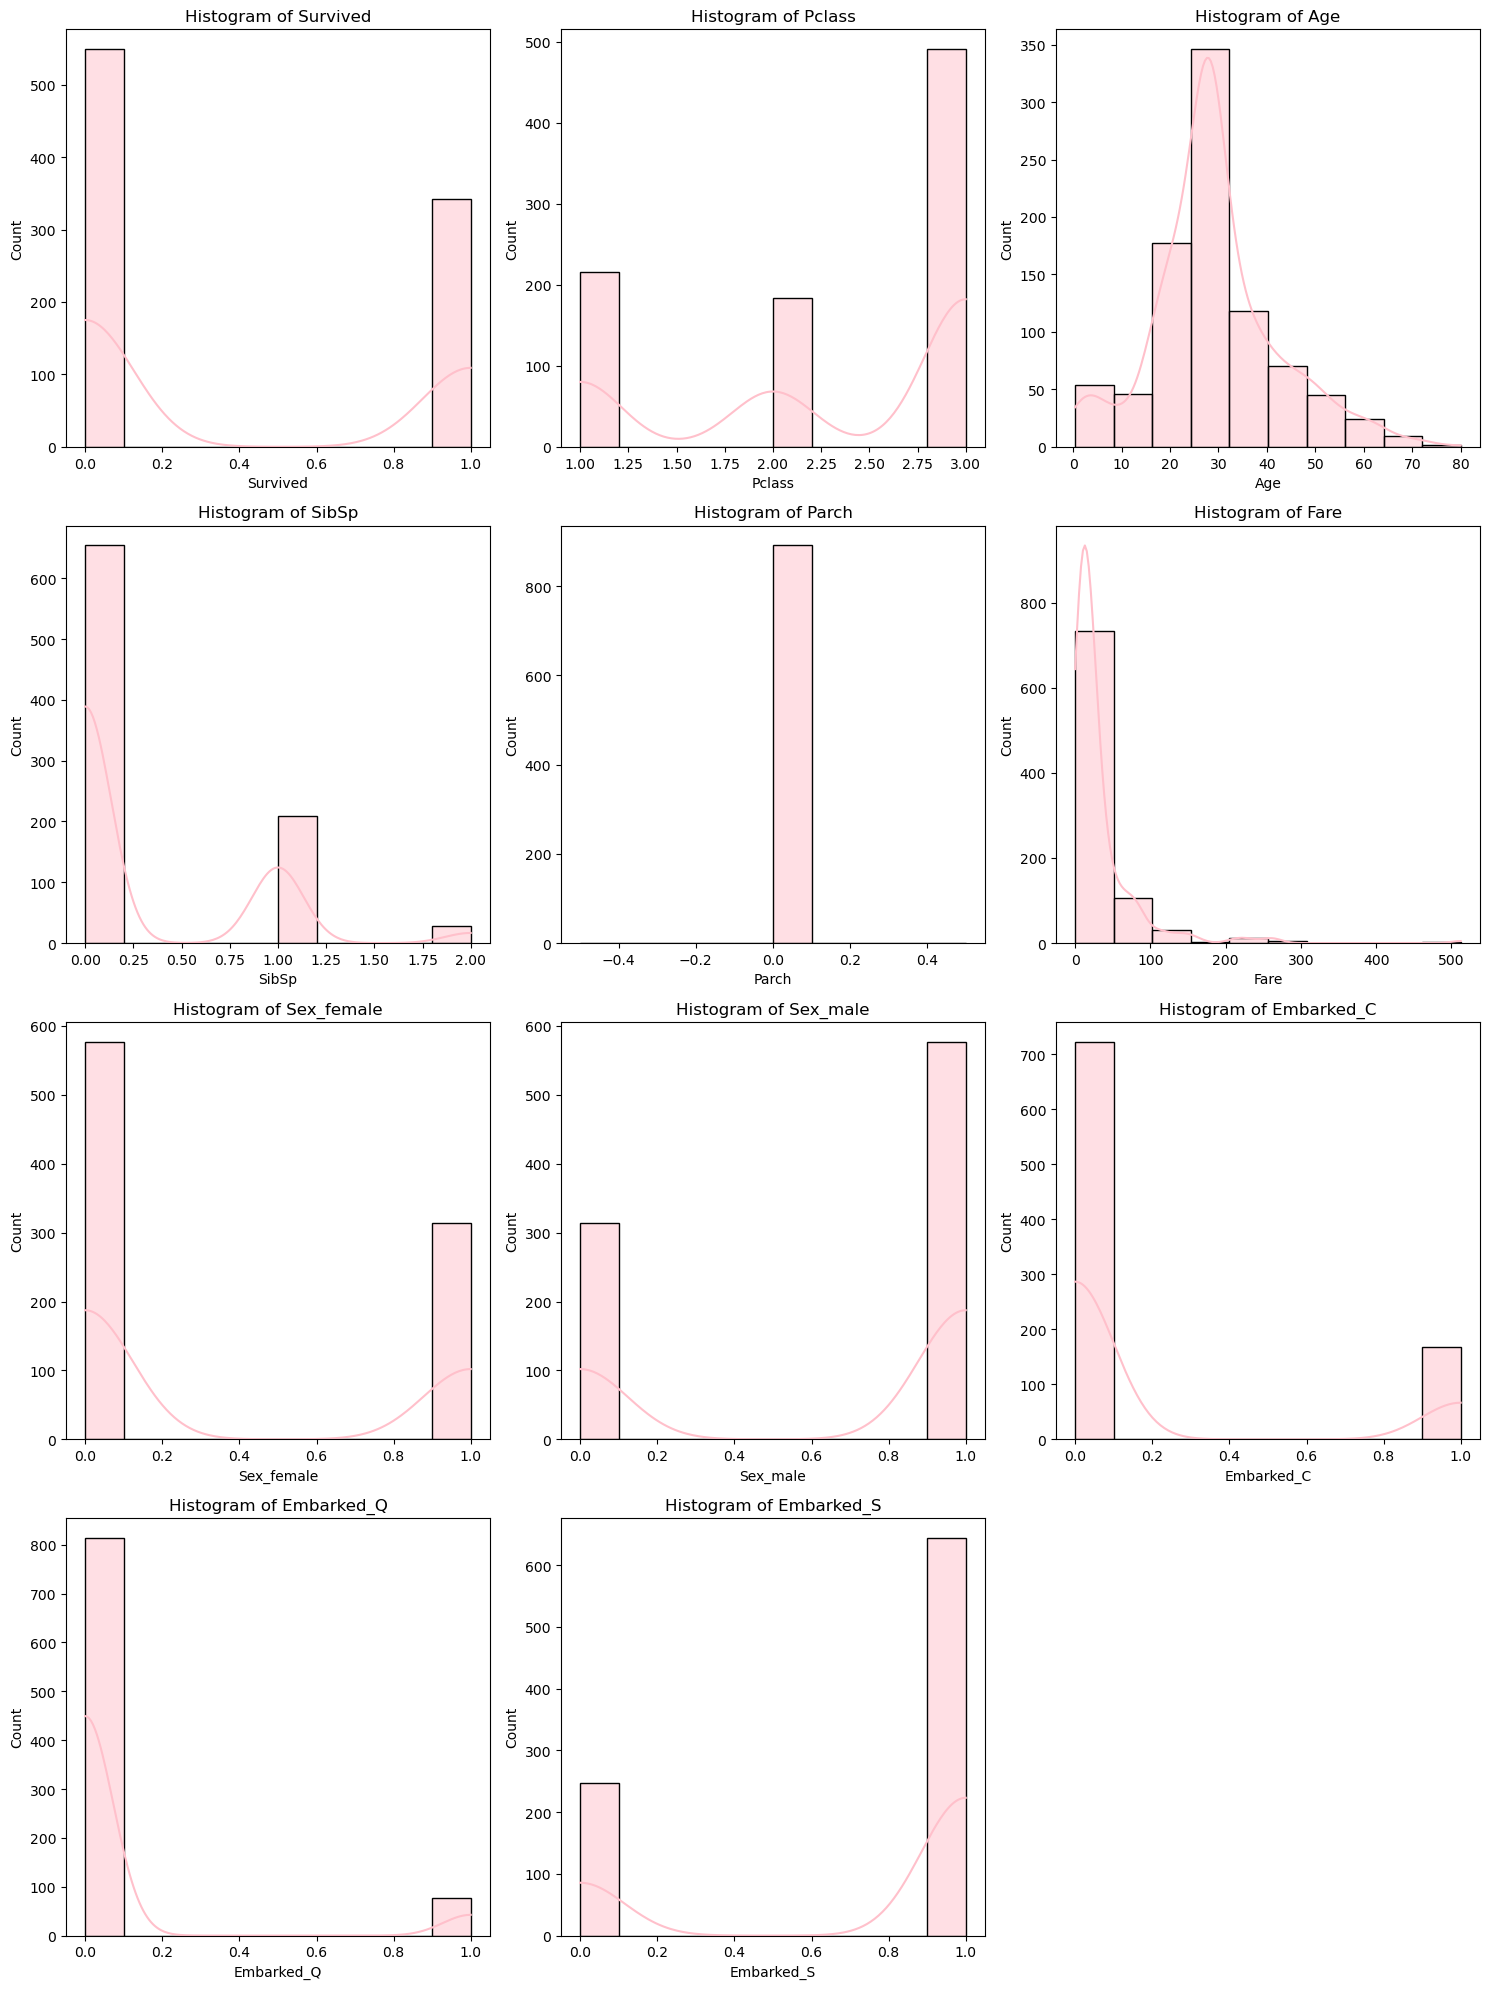

In [141]:
num_cols=len(df_cleaned.columns)
rows=math.ceil(num_cols/3)

plt.figure(figsize=(15,rows*5))
for i,col in enumerate(df_cleaned.columns,1):
    plt.subplot(rows,3,i)
    sns.histplot(df_cleaned[col], kde=True, bins=10, color='pink')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [142]:
# Standardization

In [143]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [144]:
df_cleaned.values

array([[ 0.,  3., 22., ...,  0.,  0.,  1.],
       [ 1.,  1., 38., ...,  1.,  0.,  0.],
       [ 1.,  3., 26., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 0.,  3., 32., ...,  0.,  1.,  0.]])

In [145]:
d_value = df_cleaned.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(d_value)

# Transformed data

set_printoptions(precision=3)
print (rescaledX[0:5,:]) # First 5 rows and all columns of the normalized data will be printed

[[0.    1.    0.271 0.5   0.    0.014 0.    1.    0.    0.    1.   ]
 [1.    0.    0.472 0.5   0.    0.139 1.    0.    1.    0.    0.   ]
 [1.    1.    0.321 0.    0.    0.015 1.    0.    0.    0.    1.   ]
 [1.    0.    0.435 0.5   0.    0.104 1.    0.    0.    0.    1.   ]
 [0.    1.    0.435 0.    0.    0.016 0.    1.    0.    0.    1.   ]]


In [146]:
rescaledX

array([[0.   , 1.   , 0.271, ..., 0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.472, ..., 1.   , 0.   , 0.   ],
       [1.   , 1.   , 0.321, ..., 0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.347, ..., 0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.321, ..., 1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.397, ..., 0.   , 1.   , 0.   ]])

In [147]:
df_normalized= pd.DataFrame(rescaledX, columns= df_cleaned.columns, index=df_cleaned.index)


In [148]:
df_normalized

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0.0,1.0,0.271174,0.5,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.472229,0.5,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.434531,0.5,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.434531,0.0,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,0.5,0.334004,0.0,0.0,0.025374,0.0,1.0,0.0,0.0,1.0
888,1.0,0.0,0.233476,0.0,0.0,0.058556,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,0.346569,0.5,0.0,0.045771,1.0,0.0,0.0,0.0,1.0


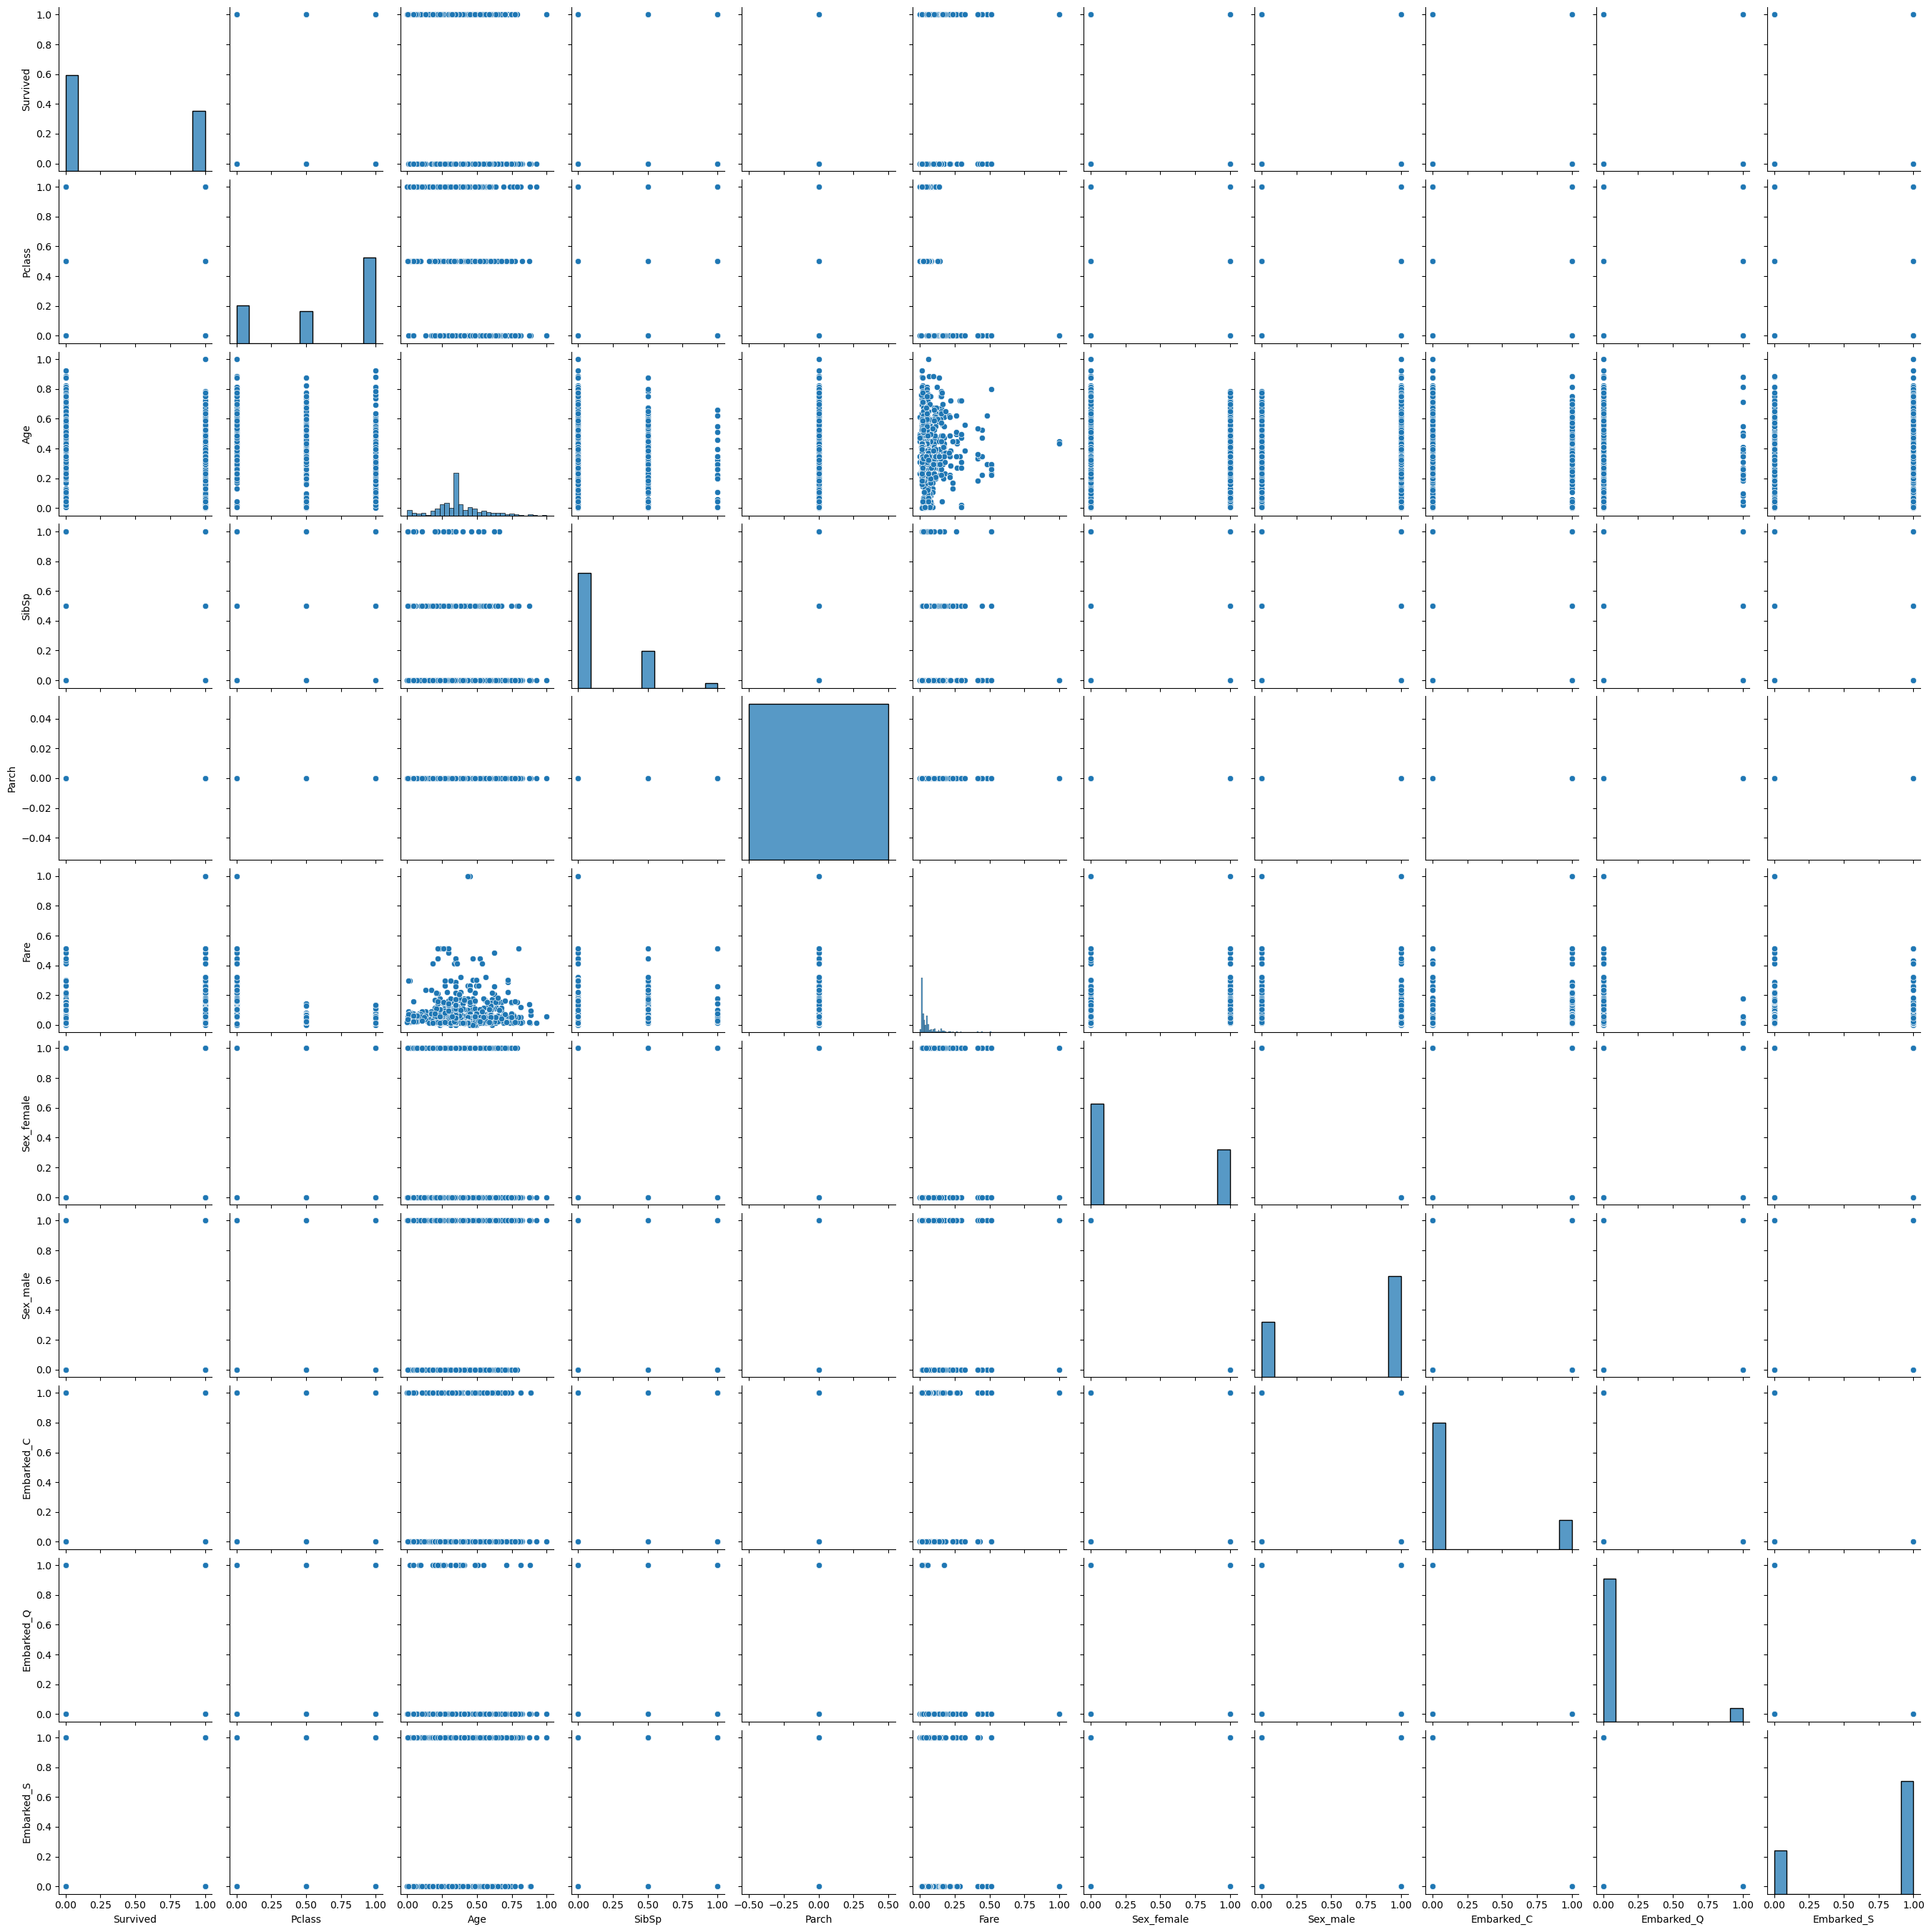

In [149]:
# Pair plots
sns.pairplot(df_normalized)
plt.show()

In [150]:
# Correlation analysis

corr_chart=df_cleaned.corr()
corr_chart

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,0.160608,NaN,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.339898,-0.128272,NaN,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.064910,-0.339898,1.000000,-0.040929,NaN,0.096688,-0.081163,0.081163,0.030248,-0.031415,-0.014665
SibSp,0.160608,-0.128272,-0.040929,1.000000,NaN,0.155645,0.173988,-0.173988,0.082738,-0.045212,-0.041059
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.257307,-0.549500,0.096688,0.155645,NaN,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.081163,0.173988,NaN,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.081163,-0.173988,NaN,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.030248,0.082738,NaN,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.031415,-0.045212,NaN,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


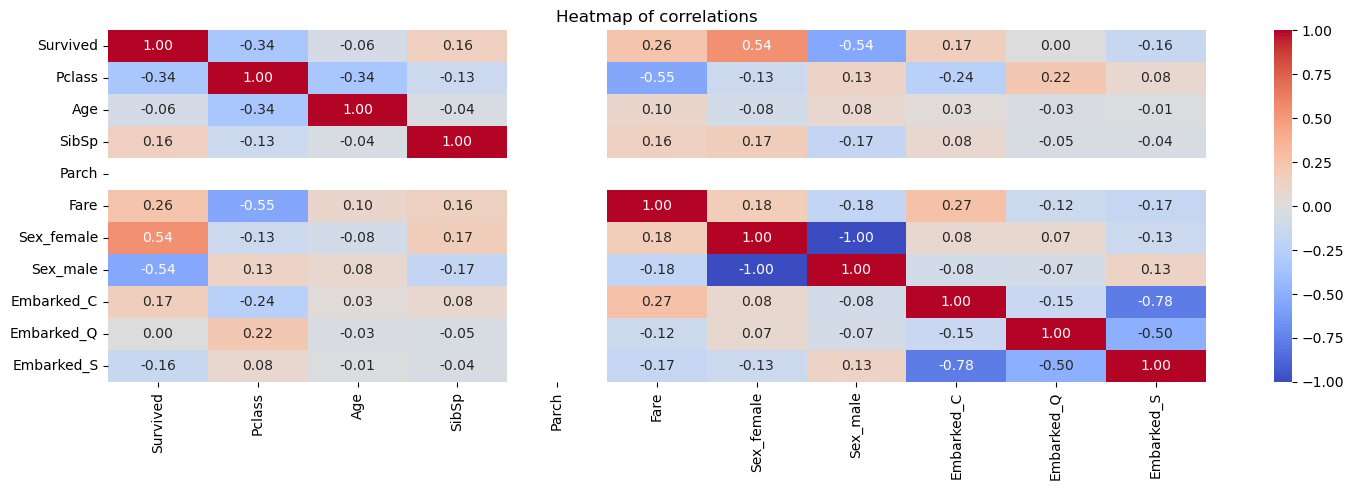

In [151]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(corr_chart, annot=True, cmap='coolwarm', fmt='.2f')
plt.title ('Heatmap of correlations')
plt.tight_layout()
plt.show()

In [152]:
# Since 'Parch' is univariate and 'Sex_female' is strongly negatively correlated to 'Sex_male', these two columns can be removed.
# It is obvious if 'Sex_female' is 0 then it will be a male. Hence retaining only 'Sex_female' column.


In [153]:
df_cleaned.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1.0,0.0,7.2500,0,1,0,0,1
2,1,1,38.0,1.0,0.0,71.2833,1,0,1,0,0


In [154]:
df_cleaned_new=df_cleaned

In [155]:
df_cleaned_new=df_cleaned_new.drop(['Parch','Sex_male'], axis=1)

In [156]:
df_cleaned_new.head(2)

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1.0,7.2500,0,0,0,1
2,1,1,38.0,1.0,71.2833,1,1,0,0


In [157]:
# Model Building

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [159]:
df_cleaned_new.shape

(891, 9)

In [160]:
# Dividing our data into input and output variables
X = df_cleaned_new.iloc[:,1:]
Y = df_cleaned_new.iloc[:,0]

In [161]:
X

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1.0,7.2500,0,0,0,1
2,1,38.0,1.0,71.2833,1,1,0,0
3,3,26.0,0.0,7.9250,1,0,0,1
4,1,35.0,1.0,53.1000,1,0,0,1
5,3,35.0,0.0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...
887,2,27.0,0.0,13.0000,0,0,0,1
888,1,19.0,0.0,30.0000,1,0,0,1
889,3,28.0,1.0,23.4500,1,0,0,1


In [162]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [163]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
y_pred = classifier.predict(X)
len(y_pred)

891

In [165]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_Value': classifier.predict(X)})

In [166]:
y_pred_df

,actual,predicted_Value
PassengerId,,
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
...,...,...
887,0,0
888,1,1
889,0,1


In [167]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[464  85]
 [101 241]]


In [168]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



In [169]:
# ROC Curve
#classifier.predict_proba (X)

[0.    0.    0.    0.002 0.002 0.002 0.002 0.004 0.004 0.005 0.005 0.005
 0.005 0.007 0.007 0.009 0.009 0.011 0.011 0.011 0.013 0.013 0.015 0.015
 0.015 0.015 0.016 0.016 0.016 0.027 0.027 0.029 0.029 0.031 0.031 0.033
 0.033 0.036 0.036 0.036 0.036 0.042 0.042 0.044 0.044 0.053 0.053 0.058
 0.058 0.058 0.062 0.062 0.064 0.064 0.066 0.066 0.067 0.067 0.077 0.077
 0.077 0.078 0.078 0.084 0.084 0.086 0.086 0.089 0.089 0.098 0.098 0.102
 0.102 0.107 0.107 0.113 0.113 0.12  0.12  0.124 0.124 0.126 0.126 0.129
 0.129 0.131 0.131 0.142 0.146 0.153 0.153 0.155 0.155 0.157 0.157 0.158
 0.158 0.16  0.16  0.164 0.164 0.168 0.168 0.171 0.171 0.173 0.173 0.184
 0.184 0.188 0.188 0.189 0.193 0.197 0.202 0.202 0.208 0.208 0.209 0.209
 0.211 0.211 0.217 0.217 0.22  0.22  0.222 0.222 0.224 0.224 0.226 0.226
 0.235 0.235 0.244 0.244 0.257 0.259 0.277 0.277 0.282 0.282 0.286 0.286
 0.291 0.295 0.297 0.297 0.304 0.306 0.311 0.311 0.322 0.328 0.337 0.342
 0.346 0.346 0.35  0.353 0.357 0.361 0.362 0.366 0.

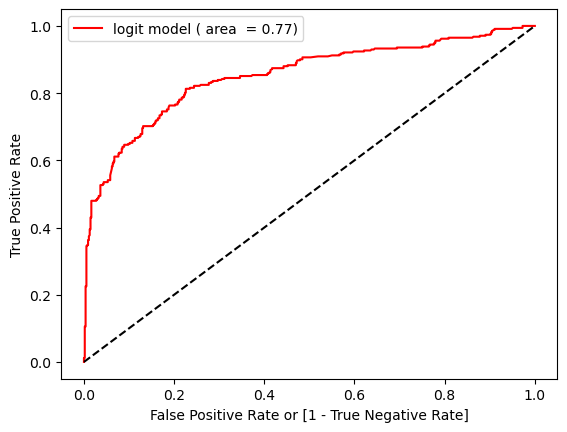

In [170]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresholds)
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

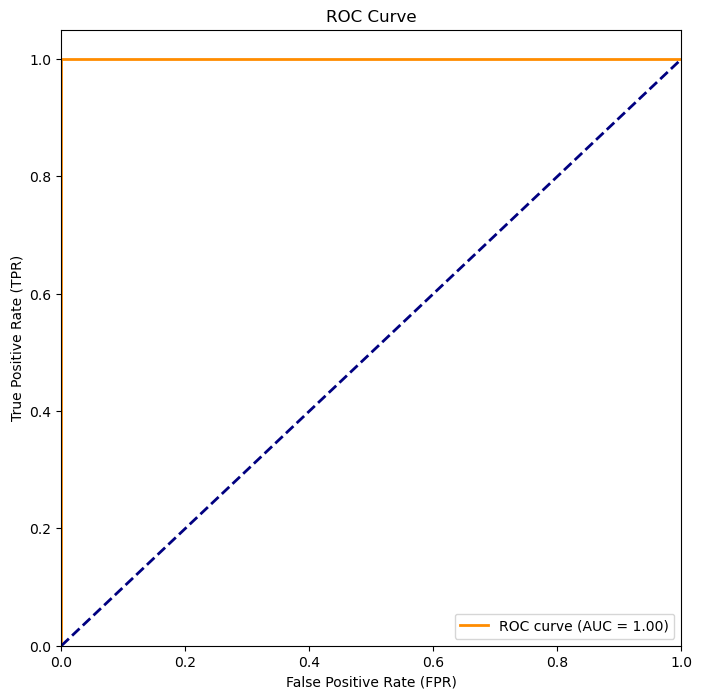

In [171]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dummy data
actual_labels = [1, 0, 1, 0, 1]
predicted_scores = [0.9, 0.1, 0.95, 0.2, 0.99]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [172]:
import statsmodels.api as sm

In [173]:
sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.448970
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.3258
Time:                        18:14:22   Log-Likelihood:                -400.03
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.789e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1148      0.136     -8.169      0.000      -1.382      -0.847
Age           -0.0299      0.007     -4.210      0.000      -0.044      -0.016
SibSp          0.2026      0.168      1.205      0.228      -0.127       0.532
Fare        7.293e-05      0.002      0.036      0.972      -0.004       0.004
Sex_female     2.5760      0.189     13.646      0.000       2.206       2.946
Embarked_C     2.1960      0.481      4.568      0.000       1.254       3.138
Embarked_Q     2.1757      0.574      3.790      0.000       1.051       3.301
Embarked_S     1.6891      0.452      3.738      0.000       0.804       2.575
==============================================================================
"""

# Importing test data

In [175]:
# Read the test data

In [176]:
rf=pd.read_csv('Titanic_test.csv')

In [177]:
rf.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [178]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [179]:
# Dropping columns - 'Name', 'Cabin', 'Parch', 'Ticket' as these are not in training dataset.

In [180]:
rf_1=rf


In [181]:
rf_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [182]:
rf_1=rf_1.drop(['Name','Cabin','Parch','Ticket'], axis=1)

In [183]:
rf_1=rf_1.set_index('PassengerId')

In [184]:
rf_1

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
892,3,male,34.5,0,7.8292,Q
893,3,female,47.0,1,7.0000,S
894,2,male,62.0,0,9.6875,Q
895,3,male,27.0,0,8.6625,S
896,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...
1305,3,male,NaN,0,8.0500,S
1306,1,female,39.0,0,108.9000,C
1307,3,male,38.5,0,7.2500,S


In [185]:
# One hot encoding of 'Embarked' and 'Sex' columns

In [186]:
rf_1=pd.get_dummies(rf_1,columns=['Sex'])

In [187]:
rf_1=pd.get_dummies(rf_1,columns=['Embarked'])

In [188]:
# Converting into numericals

In [189]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34.5,0,7.8292,False,True,False,True,False
893,3,47.0,1,7.0000,True,False,False,False,True
894,2,62.0,0,9.6875,False,True,False,True,False
895,3,27.0,0,8.6625,False,True,False,False,True
896,3,22.0,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,8.0500,False,True,False,False,True
1306,1,39.0,0,108.9000,True,False,True,False,False
1307,3,38.5,0,7.2500,False,True,False,False,True


In [190]:
rf_1[['Sex_female','Sex_male']]=rf_1[['Sex_female','Sex_male']].astype(int)

In [191]:
rf_1[['Embarked_C','Embarked_Q','Embarked_S']]=rf_1[['Embarked_C','Embarked_Q','Embarked_S']].astype(int)

In [192]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34.5,0,7.8292,0,1,0,1,0
893,3,47.0,1,7.0000,1,0,0,0,1
894,2,62.0,0,9.6875,0,1,0,1,0
895,3,27.0,0,8.6625,0,1,0,0,1
896,3,22.0,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,8.0500,0,1,0,0,1
1306,1,39.0,0,108.9000,1,0,1,0,0
1307,3,38.5,0,7.2500,0,1,0,0,1


In [193]:
rf_1.isnull().sum()

Pclass         0
Age           86
SibSp          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [194]:
m1=rf_1['Fare'].median()

In [195]:
rf_1['Fare']=rf_1['Fare'].fillna(m1)

In [196]:
m2=rf_1['Age'].median()

In [197]:
rf_1['Age'] = rf_1['Age'].fillna(m2)

In [198]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34.5,0,7.8292,0,1,0,1,0
893,3,47.0,1,7.0000,1,0,0,0,1
894,2,62.0,0,9.6875,0,1,0,1,0
895,3,27.0,0,8.6625,0,1,0,0,1
896,3,22.0,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,27.0,0,8.0500,0,1,0,0,1
1306,1,39.0,0,108.9000,1,0,1,0,0
1307,3,38.5,0,7.2500,0,1,0,0,1


In [199]:
rf_1=rf_1.drop(['Sex_male'],axis=1)

In [200]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,7.8292,0,0,1,0
893,3,47.0,1,7.0000,1,0,0,1
894,2,62.0,0,9.6875,0,0,1,0
895,3,27.0,0,8.6625,0,0,0,1
896,3,22.0,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,27.0,0,8.0500,0,0,0,1
1306,1,39.0,0,108.9000,1,1,0,0
1307,3,38.5,0,7.2500,0,0,0,1


In [201]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,7.8292,0,0,1,0
893,3,47.0,1,7.0000,1,0,0,1
894,2,62.0,0,9.6875,0,0,1,0
895,3,27.0,0,8.6625,0,0,0,1
896,3,22.0,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,27.0,0,8.0500,0,0,0,1
1306,1,39.0,0,108.9000,1,1,0,0
1307,3,38.5,0,7.2500,0,0,0,1


In [202]:
# Standardizing the dataset

In [203]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [204]:
rf_1.values

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 27. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 27. ,  1. , ...,  1. ,  0. ,  0. ]])

In [205]:
r_value=rf_1.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(r_value)

# Transformed data

set_printoptions(precision=3)
print (rescaledX[0:5,:]) # First 5 rows and all columns of the normalized data will be printed

[[1.    0.453 0.    0.015 0.    0.    1.    0.   ]
 [1.    0.618 0.125 0.014 1.    0.    0.    1.   ]
 [0.5   0.815 0.    0.019 0.    0.    1.    0.   ]
 [1.    0.354 0.    0.017 0.    0.    0.    1.   ]
 [1.    0.288 0.125 0.024 1.    0.    0.    1.   ]]


In [206]:
rescaledX

array([[1.   , 0.453, 0.   , ..., 0.   , 1.   , 0.   ],
       [1.   , 0.618, 0.125, ..., 0.   , 0.   , 1.   ],
       [0.5  , 0.815, 0.   , ..., 0.   , 1.   , 0.   ],
       ...,
       [1.   , 0.505, 0.   , ..., 0.   , 0.   , 1.   ],
       [1.   , 0.354, 0.   , ..., 0.   , 0.   , 1.   ],
       [1.   , 0.354, 0.125, ..., 1.   , 0.   , 0.   ]])

In [207]:
rf_normalized= pd.DataFrame(rescaledX, columns= rf_1.columns, index=rf_1.index)


In [208]:
rf_normalized

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,1.0,0.452723,0.000,0.015282,0.0,0.0,1.0,0.0
893,1.0,0.617566,0.125,0.013663,1.0,0.0,0.0,1.0
894,0.5,0.815377,0.000,0.018909,0.0,0.0,1.0,0.0
895,1.0,0.353818,0.000,0.016908,0.0,0.0,0.0,1.0
896,1.0,0.287881,0.125,0.023984,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1305,1.0,0.353818,0.000,0.015713,0.0,0.0,0.0,1.0
1306,0.0,0.512066,0.000,0.212559,1.0,1.0,0.0,0.0
1307,1.0,0.505473,0.000,0.014151,0.0,0.0,0.0,1.0


In [209]:
# Building predictive model. Inputting X test.

In [210]:
X_test_new = rf_normalized.iloc[:,:]

In [211]:
X_test_new

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,1.0,0.452723,0.000,0.015282,0.0,0.0,1.0,0.0
893,1.0,0.617566,0.125,0.013663,1.0,0.0,0.0,1.0
894,0.5,0.815377,0.000,0.018909,0.0,0.0,1.0,0.0
895,1.0,0.353818,0.000,0.016908,0.0,0.0,0.0,1.0
896,1.0,0.287881,0.125,0.023984,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1305,1.0,0.353818,0.000,0.015713,0.0,0.0,0.0,1.0
1306,0.0,0.512066,0.000,0.212559,1.0,1.0,0.0,0.0
1307,1.0,0.505473,0.000,0.014151,0.0,0.0,0.0,1.0


In [212]:
y_pred_new=classifier.predict(X_test_new)

In [213]:
len(y_pred_new)

418

In [214]:
y_pred_new= pd.DataFrame({'predicted_Value of test': classifier.predict(X_test_new)})

In [215]:
y_pred_new

,predicted_Value of test
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,1
415,1
416,1


In [216]:
y_pred_new.value_counts()

predicted_Value of test
1                          418
Name: count, dtype: int64

In [217]:
# When the test data is standardized all the predicted values are 1

In [218]:
# When the test data is not standardized, the values are as below. But there 
# are no actual values available to compare the metrics.

In [219]:
rf_1

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,7.8292,0,0,1,0
893,3,47.0,1,7.0000,1,0,0,1
894,2,62.0,0,9.6875,0,0,1,0
895,3,27.0,0,8.6625,0,0,0,1
896,3,22.0,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,27.0,0,8.0500,0,0,0,1
1306,1,39.0,0,108.9000,1,1,0,0
1307,3,38.5,0,7.2500,0,0,0,1


In [220]:
X_test_new_ws = rf_1.iloc[:,:]

In [221]:
X_test_new_ws

,Pclass,Age,SibSp,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5,0,7.8292,0,0,1,0
893,3,47.0,1,7.0000,1,0,0,1
894,2,62.0,0,9.6875,0,0,1,0
895,3,27.0,0,8.6625,0,0,0,1
896,3,22.0,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,27.0,0,8.0500,0,0,0,1
1306,1,39.0,0,108.9000,1,1,0,0
1307,3,38.5,0,7.2500,0,0,0,1


In [222]:
y_pred_new_ws=classifier.predict(X_test_new_ws)

In [223]:
y_pred_new_ws= pd.DataFrame({'predicted_Value of test': classifier.predict(X_test_new_ws)})

In [224]:
y_pred_new_ws

,predicted_Value of test
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [225]:
y_pred_new_ws.value_counts()

predicted_Value of test
0                          254
1                          164
Name: count, dtype: int64

In [226]:
# Without standardization the test results are accurate.

# Using Streamlit

In [399]:
import joblib
# Save trained model

joblib.dump(classifier, 'logistic_model.pkl')

['logistic_model.pkl']